In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load dataset
df = pd.read_csv('predictive_maintenance.csv')  # Replace with your dataset file name

# Inspect dataset
print("Dataset Info:")
print(df.info())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB
None


# EDA

In [53]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
matplotlib.style.use('ggplot')

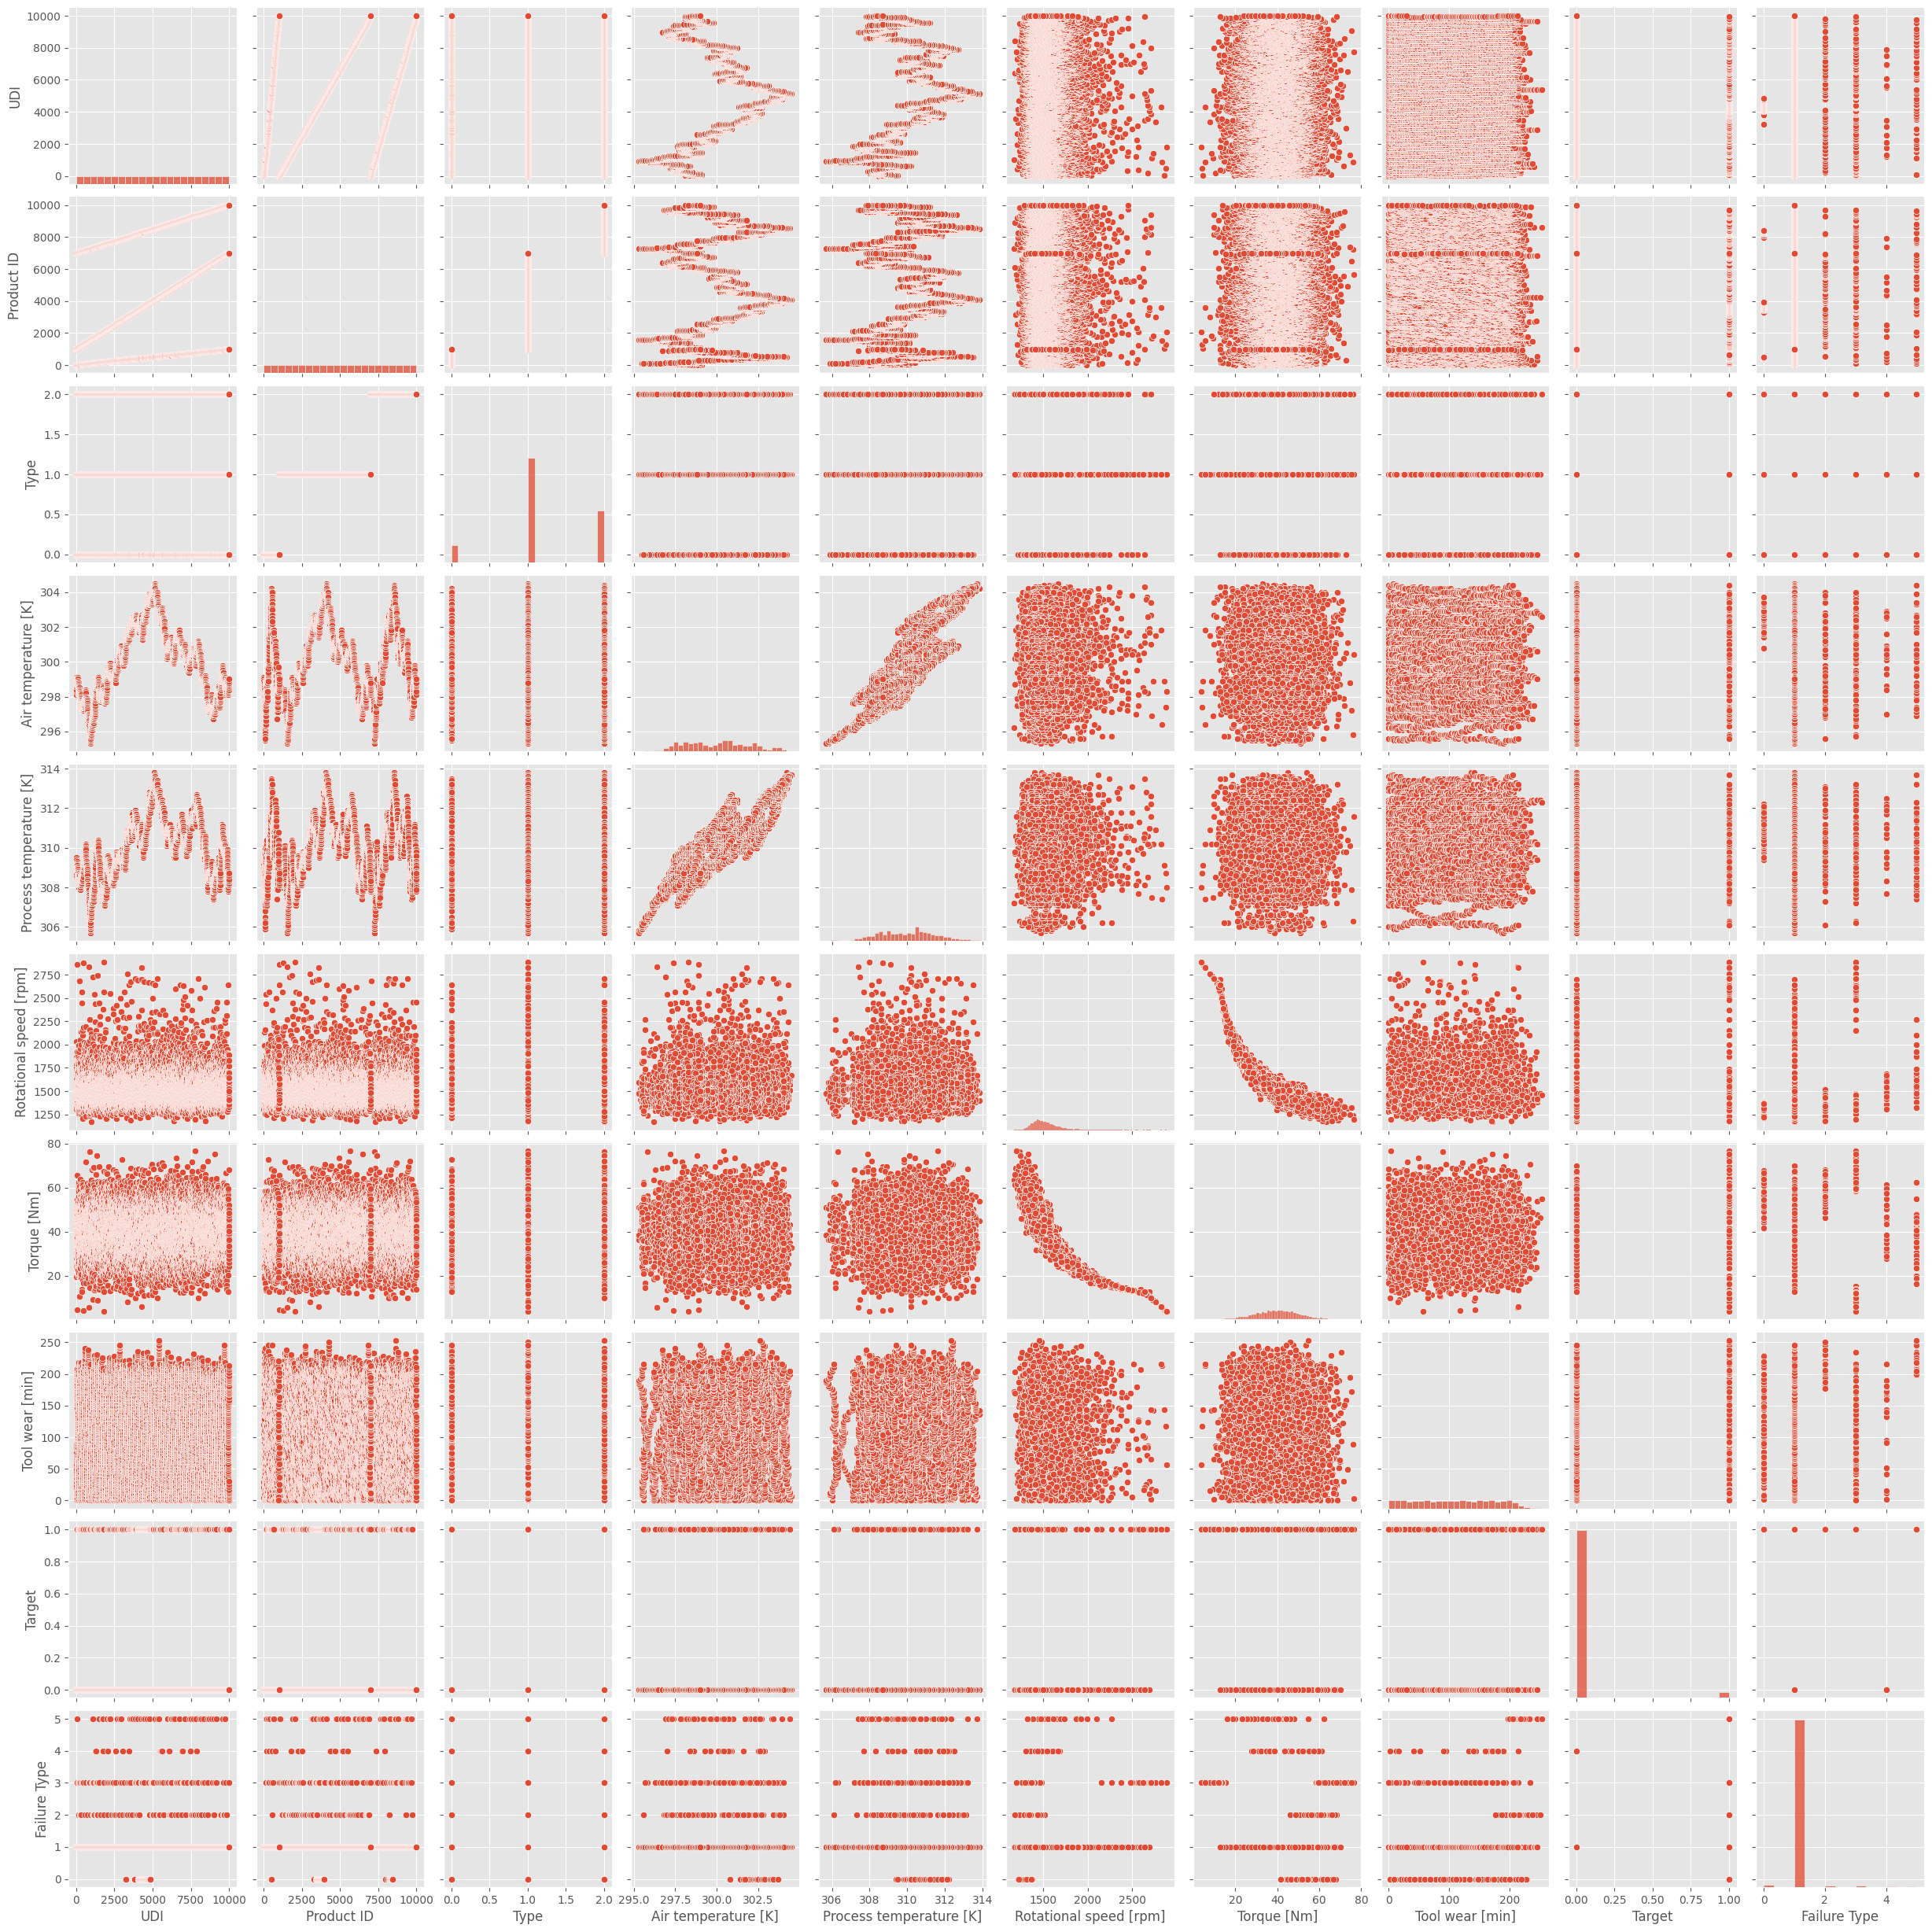

In [54]:
sns.pairplot(df)

ValueError: num must be an integer with 1 <= num <= 9, not 10

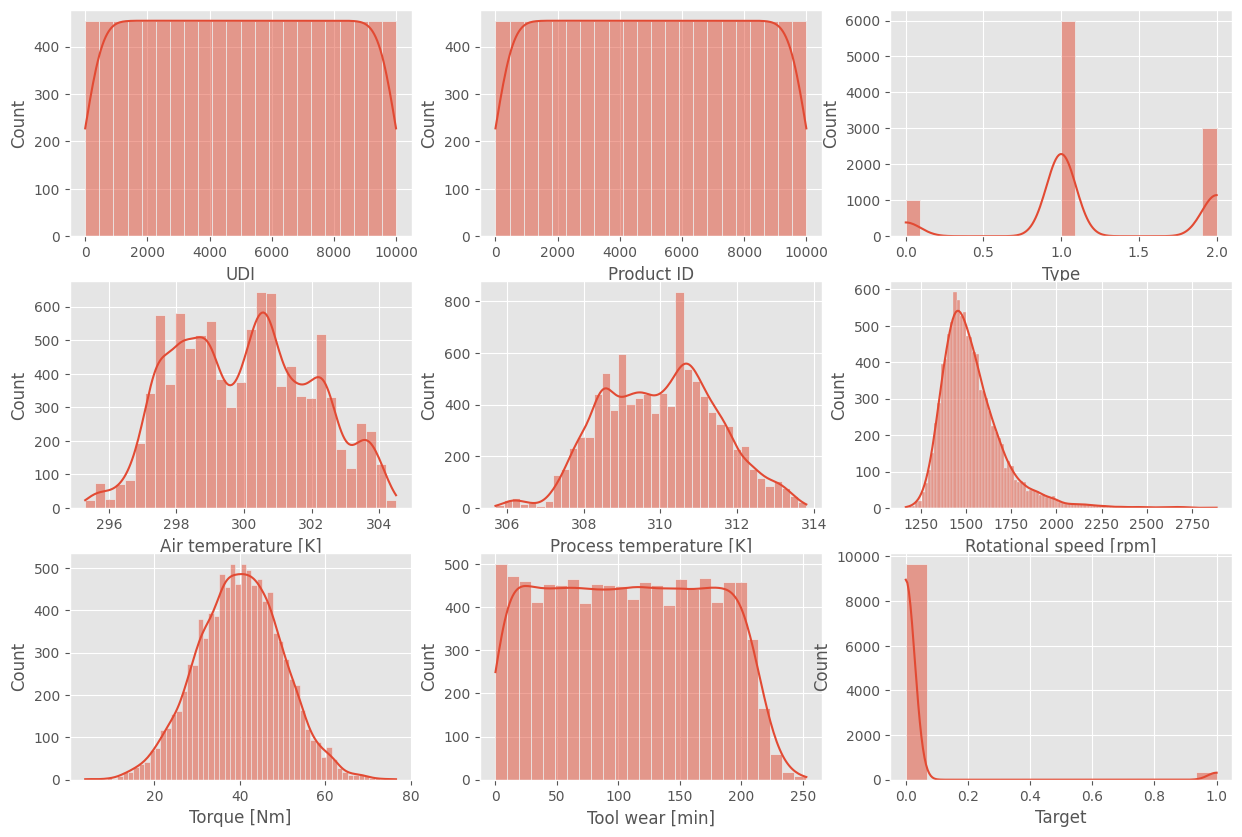

In [55]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(3,3,i)
    sns.histplot(df[col],kde=True)

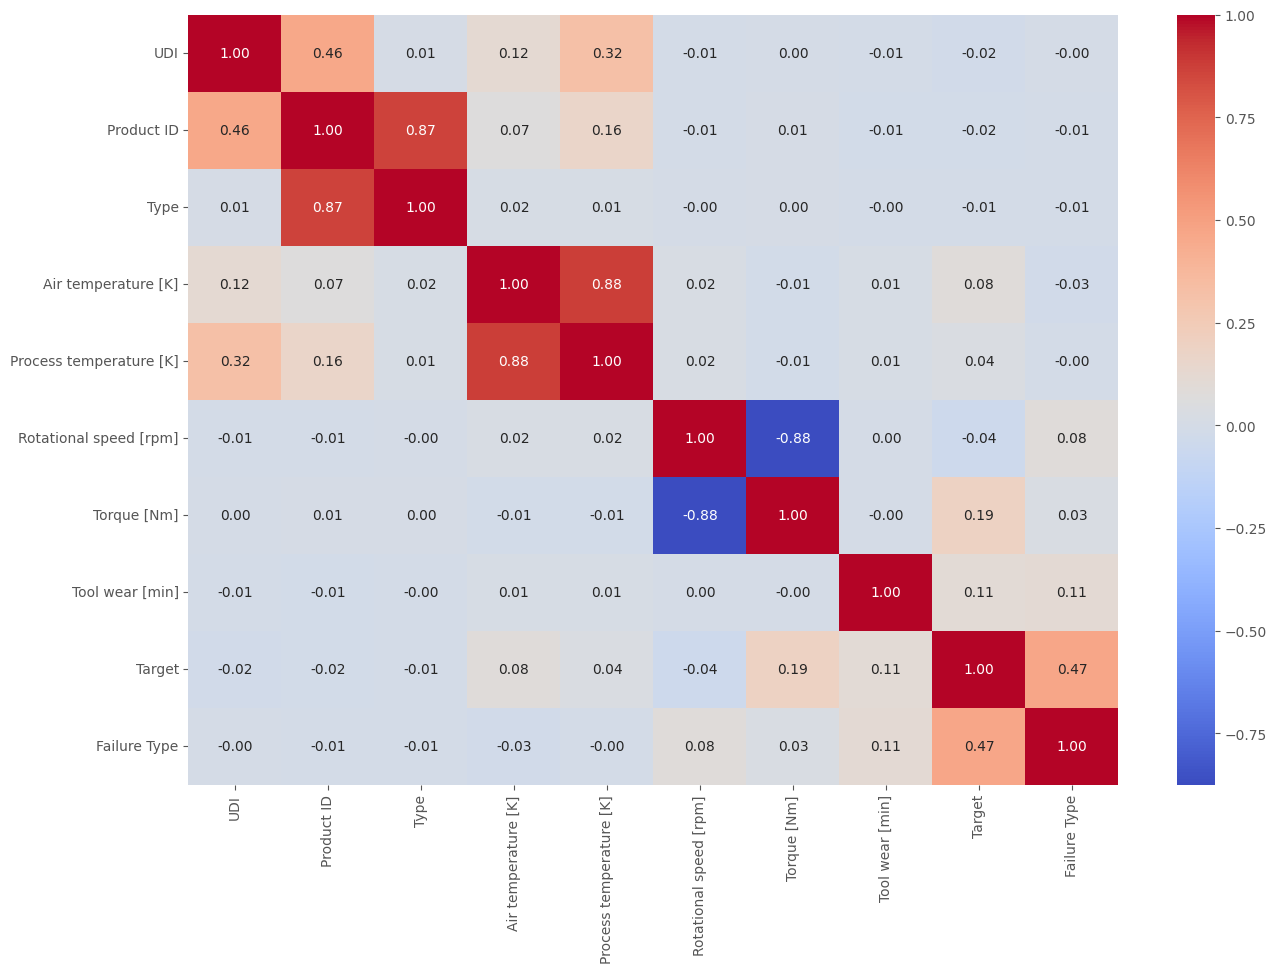

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Plot the heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


# Encoding

In [ ]:
#Encode categorical variables
label_encoder = LabelEncoder()
df['Product ID'] = label_encoder.fit_transform(df['Product ID'])
df['Type'] = label_encoder.fit_transform(df['Type'])
df['Failure Type'] = label_encoder.fit_transform(df['Failure Type'])



In [35]:
# Drop 'UDI', 'Target', and 'Failure Type' from the feature set
X = df.drop(['UDI', 'Target', 'Failure Type'], axis=1)

# Select the 'Target' and 'Failure Type' columns as the target variable
y = df[['Target', 'Failure Type']]


# Balancing the dataset

In [36]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

# Apply SMOTE to the 'Target' column
X_balanced_target, y_balanced_target = smote.fit_resample(X, y['Target'])

# Apply SMOTE to the 'Failure Type' column
X_balanced_failure, y_balanced_failure = smote.fit_resample(X, y['Failure Type'])

# Check the class distribution after SMOTE
print("Class distribution after SMOTE for 'Target':")
print(y_balanced_target.value_counts())

print("Class distribution after SMOTE for 'Failure Type':")
print(y_balanced_failure.value_counts())


Class distribution after SMOTE for 'Target':
Target
0    9661
1    9661
Name: count, dtype: int64
Class distribution after SMOTE for 'Failure Type':
Failure Type
1    9652
3    9652
5    9652
2    9652
4    9652
0    9652
Name: count, dtype: int64


# Training the datatset

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)


In [38]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [39]:
# Step 8: Test the model
y_pred = clf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test,y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1934
           1       0.99      0.99      0.99      1931

    accuracy                           0.99      3865
   macro avg       0.99      0.99      0.99      3865
weighted avg       0.99      0.99      0.99      3865



In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import joblib

# Prepare your features and target for model 1 (Failure Prediction)
X = df[['UDI']]  # Feature: Product ID (UDI)
y = df['Target']  # Target: whether the machine failed (0 or 1)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the RandomForestClassifier
model_failure = RandomForestClassifier(random_state=42)
model_failure.fit(X_train, y_train)

# Evaluate the model
y_pred = model_failure.predict(X_test)
print(classification_report(y_test, y_pred))

# Save the model
joblib.dump(model_failure, 'model_failure_predictor.pkl')


              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1939
           1       0.06      0.07      0.06        61

    accuracy                           0.94      2000
   macro avg       0.51      0.52      0.51      2000
weighted avg       0.94      0.94      0.94      2000



['model_failure_predictor.pkl']

In [43]:
# Prepare your features and target for model 2 (Failure Type Prediction)
X = df[['UDI']]  # Feature: Product ID (UDI)
y = df['Failure Type']  # Target: failure type (multi-class)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the RandomForestClassifier for failure type
model_failure_type = RandomForestClassifier(random_state=42)
model_failure_type.fit(X_train, y_train)

# Evaluate the model
y_pred = model_failure_type.predict(X_test)
print(classification_report(y_test, y_pred))

# Save the model
joblib.dump(model_failure_type, 'model_failure_type_predictor.pkl')


              precision    recall  f1-score   support

           0       0.05      0.07      0.06        15
           1       0.97      0.97      0.97      1935
           2       0.11      0.15      0.13        13
           3       0.00      0.00      0.00        20
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00        11

    accuracy                           0.94      2000
   macro avg       0.19      0.20      0.19      2000
weighted avg       0.94      0.94      0.94      2000



['model_failure_type_predictor.pkl']

# Saving the Model

In [31]:
import joblib

# Save the trained model and scaler
joblib.dump(clf, 'machine_health_model.pkl')  # Save the classifier

['machine_health_model.pkl']

# Testing the Model

In [44]:
# Load the pre-trained models (after training them in the previous step)
model_failure = joblib.load('model_failure_predictor.pkl')  # Binary classifier (failure prediction)
model_failure_type = joblib.load('model_failure_type_predictor.pkl')  # Multi-class classifier (failure type prediction)


In [51]:
# Example usage
product_id = 169 # Example Product ID

# Predict whether the machine failed
failure = predict_failure(model_failure, product_id)

if failure == 0:
    print("Machine is Working Well")
else:
    # Predict the failure type
    failure_type = predict_failure_type(model_failure_type, product_id)
    print(f"Machine Failed. Failure Type: {failure_type}")


Machine Failed. Failure Type: 3


c:\Users\Rupam Patil\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\Rupam Patil\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [49]:
# Save the preprocessed DataFrame to a CSV file
df.to_csv('preprocessed_data.csv', index=False)


In [52]:
# Mapping failure type numbers to their corresponding names
failure_type_mapping = {
    0: "Heat Dissipation",
    1: "No Failure",
    2: "Overstrain",
    3: "Power Failure",
    4: "Random",
    5: "Toolware Failure"
}

# Example usage
product_id = 169  # Example Product ID

# Predict whether the machine failed
failure = predict_failure(model_failure, product_id)

if failure == 0:
    print("Machine is Working Well")
else:
    # Predict the failure type
    failure_type = predict_failure_type(model_failure_type, product_id)
    
    # Map the failure type number to its name
    failure_type_name = failure_type_mapping.get(failure_type, "Unknown Failure Type")
    
    print(f"Machine Failed. Failure Type: {failure_type_name}")


Machine Failed. Failure Type: Power Failure


c:\Users\Rupam Patil\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\Rupam Patil\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# Conclusion

Randomforest Classifier when used on all features gave an accuracy of 99% and when we used it for training "UID" and "target" column and "UID" and "failure_type" column gave an accuracy of 94%.
(We did the 94% trainig so that on giving "UID" as input we get "Failure_type" as the output)  